# HW6: Train Neural Net for Digits Data Set

Blanca Miller <br />
STAT 760 <br />
03.22.2018 <br />

**Objective:** Using the digits dataset, reduce the dimensions of the dataset to 16 using PCA, then train a neural network for the 10 classes, and provide a confusion matrix to evaluate the performance of the classifying neural net. 

**Digits Data Set:** https://web.stanford.edu/~hastie/ElemStatLearn/

### Import Libraries

In [16]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier

### Load Digits Data Set

In [2]:
train = pd.read_csv('digits_data.train', delimiter=' ', header=None)
test = pd.read_csv('digits_data.test', delimiter=' ', header=None)

In [3]:
# print size of data sets
print("Training set: {}".format(train.shape))
print("Testing set: {}".format(test.shape))

Training set: (7291, 258)
Testing set: (2007, 257)


In [4]:
# print subset of observations for training set
train.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


In [5]:
# print subset of observations for testing set
test.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


### Convert Data Frame into Numpy Array

In [6]:
train_set = train.as_matrix()
test_set = test.as_matrix()

### Parse Data Values from their Labels & Print Dimensions

In [7]:
# grab all rows from 1st - (last-1) column
# last-1 is to remove NaN column that numpy inserted
X_train = train_set[:, 1:257]

# grab all rows for 0th column
y_train = train_set[:, 0]

# grab all rows for 1st - last columns
X_test = test_set[:, 1:]

# grab all rows for 0th column
y_test = test_set[:, 0]

In [8]:
print("Training Data: {}".format(X_train.shape))
print("Training Labels: {}".format(y_train.shape))
print("Testing Data: {}".format(X_test.shape))
print("Testing Labels: {}".format(y_test.shape))

Training Data: (7291, 256)
Training Labels: (7291,)
Testing Data: (2007, 256)
Testing Labels: (2007,)


### Determine & Print Number of Samples & Features

In [9]:
n_trains = X_train.shape[0]
n_features = X_train.shape[1]

In [10]:
print("Number of Training Samples: {}".format(n_trains))
print("Number of Data Features: {}".format(n_features))

Number of Training Samples: 7291
Number of Data Features: 256


### Standardize Data to Obtain Similar Inputs & Weight Magnitudes

In [11]:
# set axis to 1 to standardize by sample/vector, rather than by feature 
X_train = preprocessing.scale(X_train, axis=1)
X_test = preprocessing.scale(X_test, axis=1)

### Principal Component Analysis

In [12]:
# construct object representing PCA operation, executed by "fit" method
k = 16
pca = decomposition.PCA(n_components = k)

# execute PCA: identifies n components
pca.fit(X_train)

# project data: n dimensional reduced representation
X_train_trans = pca.transform(X_train)
X_test_trans = pca.transform(X_test)

# amount of information compressed in the chosen k components
pca.explained_variance_ratio_

array([ 0.15582707,  0.10293384,  0.06530886,  0.05641492,  0.04107802,
        0.03749884,  0.03463196,  0.02686704,  0.02640698,  0.02329143,
        0.02067199,  0.01869688,  0.01606247,  0.015185  ,  0.01486047,
        0.01334548])

In [13]:
# the percentage of cumulative variance - recommended keep 70%+
pca.explained_variance_ratio_.sum()

0.66908127236001991

**Analysis:** This value, the cumulative variance, tell us that reducing the data's dimensionality from the original 256 dimensions to the chosen 16 dimensions only removed ~30% of the information contained in the original components. This is OK because some of that information contains noise, such as in the form of outliers and redundancy. Thus, we are only retaining the components that provide the fundamental structure of the data set. 

In [14]:
components = pd.DataFrame(pca.components_)
components

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.020767,0.020892,0.020038,0.017383,0.011280,-0.001436,0.002770,0.074980,0.041810,-0.009762,...,-0.057267,0.023995,0.051138,-0.026917,-0.026235,-0.000480,0.013252,0.017844,0.019480,0.020427
1,0.003684,0.007541,0.013784,0.025167,0.041100,0.055579,0.051438,0.003358,0.023490,0.071997,...,-0.022188,-0.024049,-0.050959,-0.034106,-0.019799,-0.007247,0.001185,0.003255,0.003449,0.003018
2,-0.003664,0.000027,0.004500,0.011590,0.020164,0.024164,0.025705,0.046801,-0.004783,-0.046556,...,-0.030538,-0.020838,-0.035574,-0.061992,-0.021720,-0.001798,0.000242,-0.000865,-0.002337,-0.003997
3,0.000229,0.001276,-0.002920,-0.015478,-0.038011,-0.066440,-0.102984,-0.132646,-0.132645,-0.106963,...,-0.120585,-0.145045,-0.133225,-0.099457,-0.066500,-0.036361,-0.013576,-0.002375,0.001870,0.001240
4,-0.005367,0.000803,0.012565,0.035269,0.074511,0.107217,0.100940,0.006847,-0.041835,-0.053673,...,0.029224,-0.079775,-0.159146,-0.092637,-0.040494,-0.008839,0.012617,0.018684,0.010167,-0.001674
5,0.008705,0.020989,0.038342,0.057897,0.070894,0.058736,0.025441,0.029680,0.032365,0.020442,...,0.079886,0.058057,0.017509,-0.010492,-0.002587,0.002359,0.006143,0.006480,0.005991,0.005409
6,-0.000269,-0.001461,-0.000901,0.001843,0.007364,-0.003316,-0.051236,-0.100110,-0.095994,-0.051980,...,-0.055881,-0.109261,-0.016510,0.082550,0.078239,0.044593,0.018307,0.005159,0.001067,0.000370
7,0.003809,0.007156,0.008442,-0.001519,-0.036125,-0.101692,-0.172355,-0.205519,-0.091559,0.058492,...,-0.107308,-0.107256,-0.039562,0.055448,0.088751,0.074727,0.041190,0.019729,0.009248,0.003657
8,0.012086,0.015691,0.024080,0.035438,0.042813,0.036048,0.020979,0.028385,-0.015651,-0.024808,...,0.024564,0.000705,-0.036934,-0.044876,0.014082,0.029054,0.024136,0.019911,0.016647,0.013026
9,0.009731,0.007046,0.001279,-0.010767,-0.025665,-0.028249,-0.009440,0.040741,0.113026,0.143803,...,0.099118,0.134553,0.101301,0.057448,0.035104,0.018631,0.011712,0.012770,0.012188,0.010592


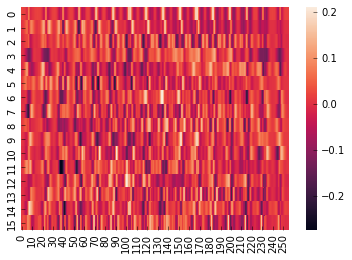

In [15]:
sb.heatmap(components)